In [1]:
import numpy as np
from glob import glob
import pylab as plt
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import confusion_matrix
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import recall_score,precision_score,classification_report,confusion_matrix,matthews_corrcoef
from scipy.ndimage import gaussian_filter
import ahunt as ah

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [162]:
fname = 'cifar10'
fname = 'mnist'
pln = 'p1'

res_all = []
res5 = []
res6 = []
nq_all = []
for i in glob('res/{}-{}*'.format(fname,pln)):
    dd = np.load(i,allow_pickle=1)
    res_allp = dd['res_all'][:,:30,:]
    nq_allp = dd['nq_all'][:30]
    res5p = dd['res5'][:6]
    res6p = dd['res6'][:6]
#     print(res_allp.shape,nq_allp.shape)
    res_all.append(res_allp)
    nq_all.append(nq_allp)
    res5.append(res5p)
    res6.append(res6p)

res_all = np.array(res_all)
nq_all = np.array(nq_all)
nq_all[nq_all==0] = 1e10
res5 = np.array(res5)
res6 = np.array(res6)
for i in range(4):
    res_all[:,i,:,4] = 100*res_all[:,i,:,4]/nq_all

res_all.shape,res5.shape,res6.shape

((100, 4, 30, 5), (100, 6, 5), (100, 6, 5))

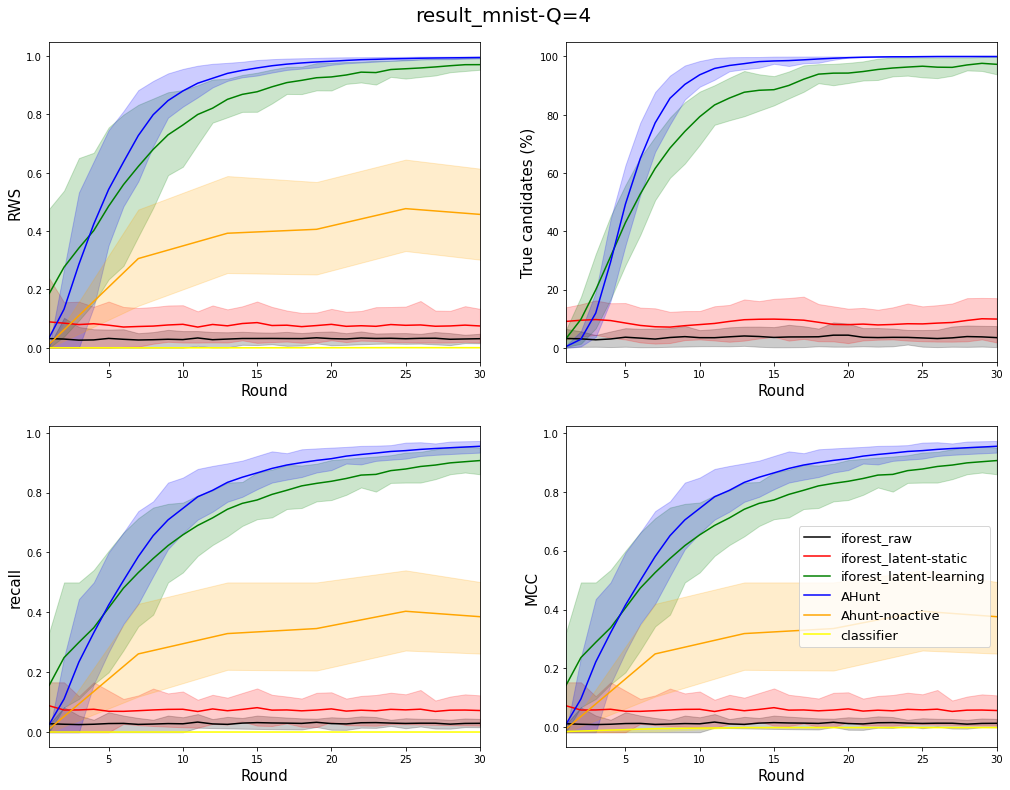

In [147]:
n_night = res_all.shape[2]
xx = np.arange(res_all.shape[2]/res5.shape[2])
xx = xx/xx.max()*n_night+1

cl = 68
alpha = 0.2
fig,axs = plt.subplots(2,2,figsize=(14,11))

lbls = ['iforest_raw','iforest_latent-static','iforest_latent-learning','AHunt']
clrs = ['k','r','g','b']
metric_names = ['RWS','True candidates (%)','recall','MCC']


for j,jj in enumerate([0,4,1,3]):
    ax = axs[j//2,j%2]
    for  i in range(4):
        metric = res_all[:,i,:,jj]
        if jj==4:
            metric = gaussian_filter(metric,0.9)
        ah.analyze_plot(ax, metric=metric, x=np.arange(n_night)+1, cl=cl, clr=clrs[i], label=lbls[i], alpha=alpha)
        
    if jj!=4:
        ah.analyze_plot(ax, metric=res5[:,:,jj], x=xx, cl=cl, clr='orange', label='Ahunt-noactive', alpha=alpha)
        ah.analyze_plot(ax, metric=res6[:,:,jj], x=xx, cl=cl, clr='yellow', label='classifier', alpha=alpha)
#             m5 = np.mean(res5[:,jj])
#             ax.plot(np.arange(n_night),n_night*[m5],'b--',label='classifier')

#             m6 = np.mean(res6[:,jj])
#             ax.plot(np.arange(n_night),n_night*[m6],'k--',label='classifier')

    ax.set_xlabel('Round',fontsize=15)
    ax.set_ylabel(metric_names[j],fontsize=15)
#     ax.set_xlim(0,n_night-1)
    ax.set_xlim(1,n_night)

#     if jj==4:
#         ax.set_ylim(-1,102)
#     else:
#         ax.set_ylim(-0.05,1.05)
    
ax.legend(fontsize=13)
plt.subplots_adjust(left=0.05, bottom=0.06, right=0.99, top=0.95, wspace=None, hspace=None)
if pln == 'p0':
    plnf = 'Q threshold=0.5'
if pln == 'p1':
    plnf = 'Q=4'
plt.suptitle('result_{}-{}'.format(fname,plnf),fontsize=20,y=0.995)
plt.savefig('result_{}-{}.jpg'.format(fname,plnf),dpi=150)

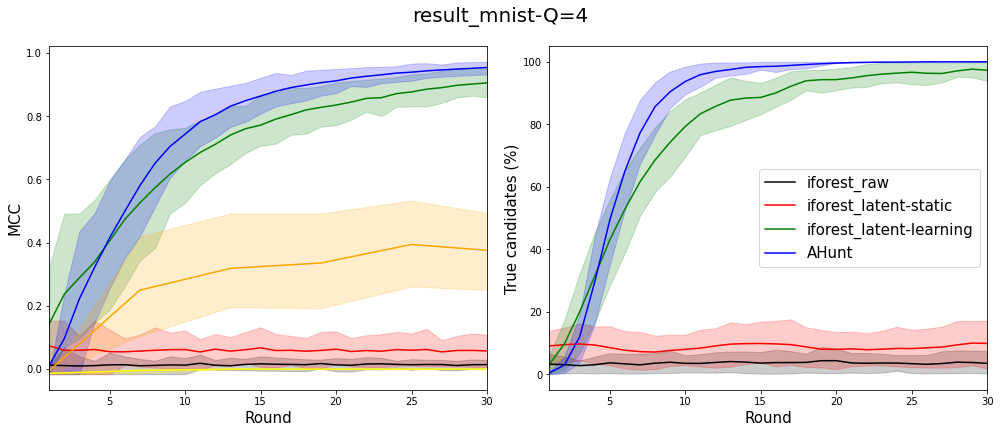

In [163]:
n_night = res_all.shape[2]
xx = np.arange(res_all.shape[2]/res5.shape[2])
xx = xx/xx.max()*n_night+1

cl = 68
alpha = 0.2
fig,axs = plt.subplots(1,2,figsize=(14,6))

lbls = ['iforest_raw','iforest_latent-static','iforest_latent-learning','AHunt']
clrs = ['k','r','g','b']
metric_names = ['MCC','True candidates (%)']


for j,jj in enumerate([3,4]):
    ax = axs[j%2]
    for  i in range(4):
        metric = res_all[:,i,:,jj]
        if jj==4:
            metric = gaussian_filter(metric,0.9)
        ah.analyze_plot(ax, metric=metric, x=np.arange(n_night)+1, cl=cl, clr=clrs[i], label=lbls[i], alpha=alpha)
        
    if jj!=4:
        ah.analyze_plot(ax, metric=res5[:,:,jj], x=xx, cl=cl, clr='orange', label='Ahunt-noactive', alpha=alpha)
        ah.analyze_plot(ax, metric=res6[:,:,jj], x=xx, cl=cl, clr='yellow', label='classifier', alpha=alpha)
#             m5 = np.mean(res5[:,jj])
#             ax.plot(np.arange(n_night),n_night*[m5],'b--',label='classifier')

#             m6 = np.mean(res6[:,jj])
#             ax.plot(np.arange(n_night),n_night*[m6],'k--',label='classifier')

    ax.set_xlabel('Round',fontsize=15)
    ax.set_ylabel(metric_names[j],fontsize=15)
#     ax.set_xlim(0,n_night-1)
    ax.set_xlim(1,n_night)

#     if jj==4:
#         ax.set_ylim(-1,102)
#     else:
#         ax.set_ylim(-0.05,1.05)
    
ax.legend(fontsize=15)
plt.subplots_adjust(left=0.05, bottom=0.06, right=0.99, top=0.95, wspace=None, hspace=None)
if pln == 'p0':
    plnf = 'Q threshold=0.5'
if pln == 'p1':
    plnf = 'Q=4'
plt.suptitle('result_{}-{}'.format(fname,plnf),fontsize=20,y=0.995)
plt.tight_layout()
plt.savefig('result2_{}-{}.jpg'.format(fname,plnf),dpi=150)

In [148]:
preds3s = []
preds4s = []
for i in glob('res/{}-{}*'.format(fname,pln)):
    dd = np.load(i,allow_pickle=1)
    preds3 = dd['preds3']
    preds4 = dd['preds4']
#     print(preds3.shape,preds4.shape)
    preds3s.append(preds3)
    preds4s.append(preds4)

def wl(ind,nprd,dr):
    return dr-ind//nprd

wlists = []
for preds3 in preds3s:

    nround = len(preds3)
    nprd = preds3[0].shape[0]

    inds = []
    for i in range(nround):
        xx = preds3[i]
        ind = np.where(np.sum(xx,axis=1)==2)
        inds.append(ind[0])

    detected = []
    wlist = []

    for rr,ind in enumerate(inds):
        for i in ind:
            if not i in detected:
    #             print(rr,i)
                wlist.append(wl(i,nprd,rr))
        detected.extend(ind)

    wlist.extend([nround+1]*np.setdiff1d(np.where(preds3[-1][:,0])[0],detected).shape[0])
    wlists.append(wlist)

mm = np.mean(np.array(wlists),axis=0)
ll = np.percentile(np.array(wlists),16,axis=0)
uu = np.percentile(np.array(wlists),100-16,axis=0)

In [151]:
np.c_[ll,uu].T.shape

(2, 180)

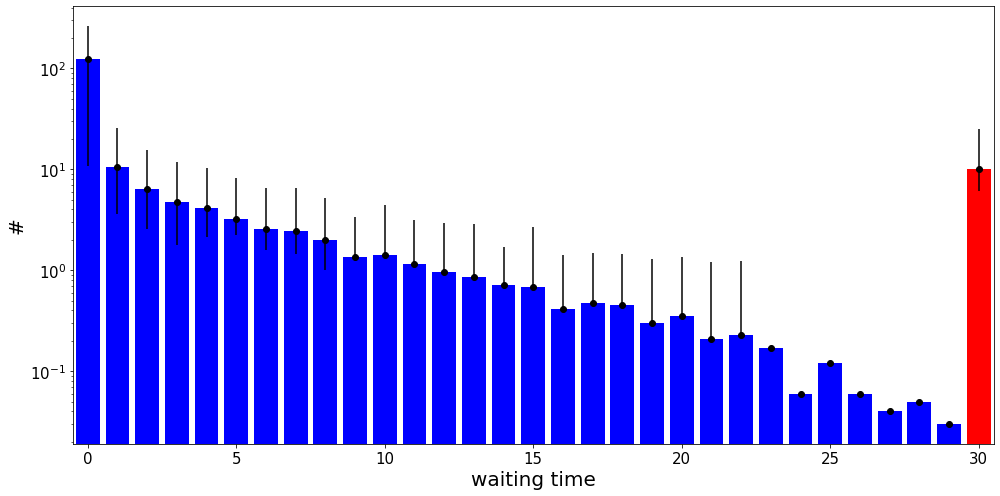

In [152]:
import matplotlib.pyplot as plt
  
hists = []
for wlist in wlists:
    hist,bin_edges = np.histogram(wlist,bins=np.arange(nround+2))
    hists.append(hist)

binc = 0.5*(bin_edges[1:]+bin_edges[:-1])
# a = np.arange(len(wlists[0]))
# b = 
a = binc[:]-0.5
b = np.mean(hists,axis=0)[:]
ll = np.percentile(hists,16,axis=0)[:]
uu = np.percentile(hists,100-16,axis=0)[:]
# Plot scatter here

fig,ax = plt.subplots(1,1,figsize=(14,7))

ax.bar(a[:-1],b[:-1],color='b')
ax.errorbar(a[:-1], b[:-1], yerr=np.c_[ll,uu][:-1].T, fmt="o", color="k")

ax.bar(a[-1],b[-1],color='r')
ax.errorbar(a[-1], b[-1], yerr=np.c_[ll[-1],uu[-1]].T, fmt="o", color="k")
  
ax.set_yscale('log')
ax.set_xlim(-0.5,nround+0.5)
ax.set_xlabel('waiting time',fontsize=20)
ax.set_ylabel('#',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.tight_layout()
plt.savefig('wating-{}-{}.jpg'.format(fname,plnf),dpi=150)

In [5]:
pp3 = []
for ii in range(len(preds3)):
    pp3.append(np.stack([preds3[ii] for preds3 in preds3s],axis=0))

In [40]:
(np.sum(pp3[0][0],axis=1)==2).sum()

0

In [56]:
ndpn = pp3[0].shape[1]

In [61]:
cpr = []
for rr in range(len(pp3)):
    ss = []
    for i in range(100):
        xx = (np.sum(pp3[rr][i],axis=1)==2)
        xx = np.array_split(xx,ndpn)
        xx = np.stack(xx,0)
        ss.append(np.sum(xx,axis=0))
    cpr.append(ss)

In [69]:
.shape

(100, 2)

In [68]:
np.array(cpr[0]).shape

(100, 1)

In [9]:
# i = 0
# ss = np.concatenate([np.array(cpr[i]),np.array(cpr[i])-np.array(cpr[i])],axis=1)
# cpr[i+1]-ss

In [19]:
pp3[3].shape

(100, 1200, 2)

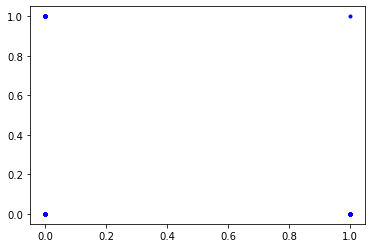

In [9]:
plt.plot(*preds3[3].T,'b.')

In [ ]:
mode = 'smp'
# mode = 'vgg'

res_all = []
res5 = []
res6 = []
nq_all = []
for i in glob('/home/vafaeisa/scratch/ahunt_project/res/nt*-{}-nl64GAL_res.npz'.format(mode)):
    dd = np.load(i)
    res_allp = dd['res_all']#[0]
    nq_allp = dd['nq_all']#[0]
    res5p = dd['res5']#[0]
    res6p = dd['res6']#[0]
#     print(res_allp.shape,nq_allp.shape)
    res_all.append(res_allp)
    nq_all.append(nq_allp)
    res5.append(res5p)
    res6.append(res6p)

res_all = np.array(res_all)
nq_all = np.array(nq_all)
nq_all[nq_all==0] = 1e10
res5 = np.array(res5)
res6 = np.array(res6)
# for i in range(4):
#     res_all[:,i,:,4] = 100*res_all[:,i,:,4]/nq_all

res_all.shape,res5.shape,res6.shape

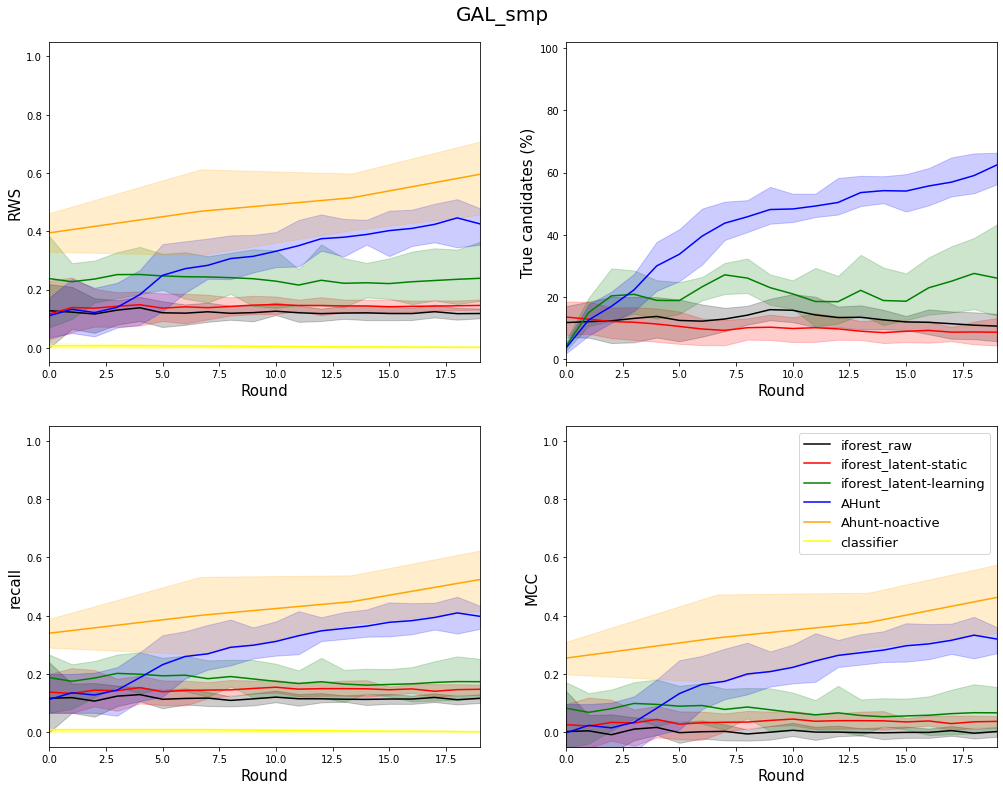

In [25]:
n_night = res_all.shape[2]
xx = np.arange(res_all.shape[2]/res5.shape[2])
xx = xx/xx.max()*n_night

cl = 68
alpha = 0.2
fig,axs = plt.subplots(2,2,figsize=(14,11))

lbls = ['iforest_raw','iforest_latent-static','iforest_latent-learning','AHunt']
clrs = ['k','r','g','b']
metric_names = ['RWS','True candidates (%)','recall','MCC']


for j,jj in enumerate([0,4,1,3]):
    ax = axs[j//2,j%2]
    for  i in range(4):
        metric = res_all[:,i,:,jj]
        if jj==4:
            metric = gaussian_filter(metric,0.7)
        ah.analyze_plot(ax, metric=metric, cl=cl, clr=clrs[i], label=lbls[i], alpha=alpha)
        
    if jj!=4:
        ah.analyze_plot(ax, metric=res5[:,:,jj], x=xx, cl=cl, clr='orange', label='Ahunt-noactive', alpha=alpha)
        ah.analyze_plot(ax, metric=res6[:,:,jj], x=xx, cl=cl, clr='yellow', label='classifier', alpha=alpha)
#             m5 = np.mean(res5[:,jj])
#             ax.plot(np.arange(n_night),n_night*[m5],'b--',label='classifier')

#             m6 = np.mean(res6[:,jj])
#             ax.plot(np.arange(n_night),n_night*[m6],'k--',label='classifier')

    ax.set_xlabel('Round',fontsize=15)
    ax.set_ylabel(metric_names[j],fontsize=15)
#     ax.set_xlim(0,n_night-1)
    ax.set_xlim(0,19)

    if jj==4:
        ax.set_ylim(-1,102)
    else:
        ax.set_ylim(-0.05,1.05)
    
ax.legend(fontsize=13)
plt.subplots_adjust(left=0.05, bottom=0.06, right=0.99, top=0.95, wspace=None, hspace=None)
plnf = 'Q=15'
plt.suptitle('GAL_{}'.format(mode),fontsize=20,y=0.995)
plt.savefig('GAL_{}.jpg'.format(mode),dpi=150)

In [17]:
mode = 'smp'
# mode = 'vgg'

preds3s = []
preds4s = []
for i in glob('/home/vafaeisa/scratch/ahunt_project/res/nt*-{}-nl64GAL_res.npz'.format(mode)):
    dd = np.load(i,allow_pickle=1)
    preds3 = dd['preds3']
    preds4 = dd['preds4']
#     print(preds3.shape,preds4.shape)
    preds3s.append(preds3)
    preds4s.append(preds4)

def wl(ind,nprd,dr):
    return dr-ind//nprd

wlists = []
for preds3 in preds3s:

    nround = len(preds3)
    nprd = preds3[0].shape[0]

    inds = []
    for i in range(nround):
        xx = preds3[i]
        ind = np.where(np.sum(xx,axis=1)==2)
        inds.append(ind[0])

    detected = []
    wlist = []

    for rr,ind in enumerate(inds):
        for i in ind:
            if not i in detected:
    #             print(rr,i)
                wlist.append(wl(i,nprd,rr))
        detected.extend(ind)

    wlist.extend([nround+1]*np.setdiff1d(np.where(preds3[-1][:,0])[0],detected).shape[0])
    wlists.append(wlist)

mm = np.mean(np.array(wlists),axis=0)
ll = np.percentile(np.array(wlists),16,axis=0)
uu = np.percentile(np.array(wlists),100-16,axis=0)

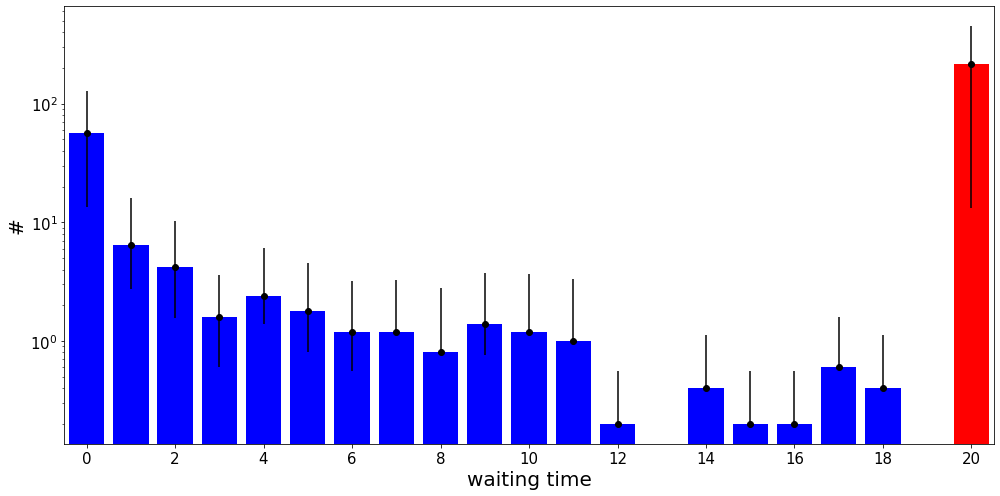

In [21]:
import matplotlib.pyplot as plt
  
hists = []
for wlist in wlists:
    hist,bin_edges = np.histogram(wlist,bins=np.arange(nround+2))
    hists.append(hist)

binc = 0.5*(bin_edges[1:]+bin_edges[:-1])
# a = np.arange(len(wlists[0]))
# b = 
a = binc[:]-0.5
b = np.mean(hists,axis=0)[:]
ll = np.percentile(hists,16,axis=0)[:]
uu = np.percentile(hists,100-16,axis=0)[:]
# Plot scatter here

fig,ax = plt.subplots(1,1,figsize=(14,7))

ax.bar(a[:-1],b[:-1],color='b')
ax.errorbar(a[:-1], b[:-1], yerr=np.c_[ll,uu][:-1].T, fmt="o", color="k")

ax.bar(a[-1],b[-1],color='r')
ax.errorbar(a[-1], b[-1], yerr=np.c_[ll[-1],uu[-1]].T, fmt="o", color="k")

ax.set_xticks(np.arange(0,nround+1,2))
# ax.set_xticklabels()

ax.set_yscale('log')
ax.set_xlim(-0.5,nround+0.5)
ax.set_xlabel('waiting time',fontsize=20)
ax.set_ylabel('#',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.tight_layout()
plt.savefig('wating-{}-{}.jpg'.format('GAL',plnf),dpi=150)